In [69]:
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Lab | Goodness of Fit and Independence Tests

## Question 1
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](https://education-team-2020.s3.eu-west-1.amazonaws.com/ds-ai/lab-goodness-of-fit/table4.png)

In [70]:
# your answer here
data = {
    'Physical Activity': ['Low', 'Medium', 'High'],
    'Sugary Drinks (Yes)': [32, 14, 6],
    'Sugary Drinks (No)': [12, 22, 9]
}

df = pd.DataFrame(data)
df['Total'] = df['Sugary Drinks (Yes)'] + df['Sugary Drinks (No)']

vertical_totals = df[['Sugary Drinks (Yes)', 'Sugary Drinks (No)', 'Total']].sum()
vertical_totals['Physical Activity'] = 'Total'
vertical_totals_df = pd.DataFrame(vertical_totals).T
df = pd.concat([df, vertical_totals_df], ignore_index=True)

df

,Physical Activity,Sugary Drinks (Yes),Sugary Drinks (No),Total
0,Low,32,12,44
1,Medium,14,22,36
2,High,6,9,15
3,Total,52,43,95


In [71]:
data = [
    [32, 12],
    [14, 22],
    [6, 9]
]
df = pd.DataFrame(data)
df.index = ["Low", "Medium", "High"]
df.columns = ["Yes", "No"]
df

,Yes,No
Low,32,12
Medium,14,22
High,6,9


In [72]:
statistic, pvalue, dof, expected_freq = st.chi2_contingency(np.array(df))
df_expected = pd.DataFrame(expected_freq)
print(f"pvalue: {pvalue}")

df_expected.index = ["Low", "Medium", "High"]
df_expected.columns = ["Yes", "No"]
df_expected

pvalue: 0.004719280137040844


,Yes,No
Low,24.084211,19.915789
Medium,19.705263,16.294737
High,8.210526,6.789474


In [73]:
# The p-value is 0.0047, which is less than the conventional threshold of 0.05.  This means there is a statistically significant association between physical activity level and sugary drink consumption.
# The likelihood that the observed differences happened by random chance is very low — we reject the null hypothesis of independence.

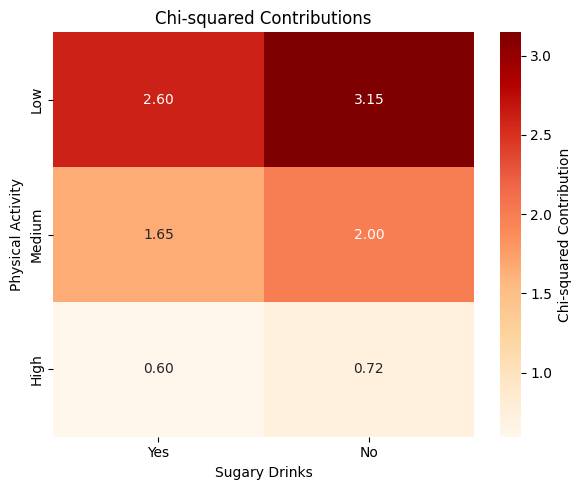

In [74]:
chi2_contrib = (df - df_expected) ** 2 / df_expected

# Plot heatmap of chi-squared contributions
plt.figure(figsize=(6, 5))
sns.heatmap(chi2_contrib, annot=True, fmt=".2f", cmap="OrRd", cbar_kws={'label': 'Chi-squared Contribution'})
plt.title("Chi-squared Contributions")
plt.xlabel("Sugary Drinks")
plt.ylabel("Physical Activity")
plt.tight_layout()
plt.show()

## [OPTIONAL] Question 2
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](https://education-team-2020.s3.eu-west-1.amazonaws.com/ds-ai/lab-goodness-of-fit/table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

Observed frequencies (grouped): [ 35  99 104 110  62  25  10   3]
Expected frequencies (grouped): [ 39.24  95.56 116.34  94.43  57.49  28.    11.36   5.58]


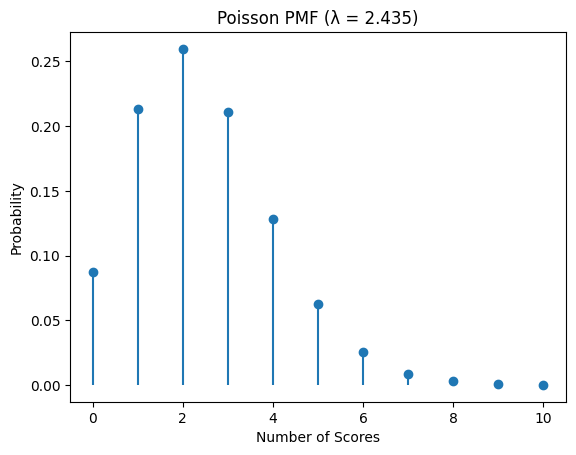


Chi-square components by group: [0.459 0.124 1.309 2.567 0.355 0.32  0.163 1.194]
Chi-square statistic: 6.491
Degrees of Freedom: 6
p-value: 0.370

At the 0.05 significance level, we fail to reject the null hypothesis.
There is no evidence to suggest that the observed scores differ from the Poisson model.


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chi2

# Observed frequencies from the data
observed = {
    '0': 35,
    '1': 99,
    '2': 104,
    '3': 110,
    '4': 62,
    '5': 25,
    '6': 10,
    '>=7': 3  
}
# Order: 0, 1, 2, 3, 4, 5, 6, >=7
obs_values = np.array([
    observed['0'],
    observed['1'],
    observed['2'],
    observed['3'],
    observed['4'],
    observed['5'],
    observed['6'],
    observed['>=7']
])
N = 448  # total number of matches
lam = 2.435  # estimated Poisson parameter

# Expected frequencies for k = 0 to 6 calculated individually:
expected_probs = [poisson.pmf(k, lam) for k in range(7)]
expected_counts = np.array(expected_probs) * N

# For k >= 7, compute the tail probability:
tail_prob_final = 1 - poisson.cdf(6, lam)
expected_tail_final = tail_prob_final * N

# Combine expected frequencies in an array with 8 groups:
expected_grouped = np.append(expected_counts, expected_tail_final)

print("Observed frequencies (grouped):", obs_values)
print("Expected frequencies (grouped):", np.round(expected_grouped, 2))

# Optional: Plot the Poisson pmf
k_values = np.arange(0, 11)
pmf_values = poisson.pmf(k_values, lam)
plt.stem(k_values, pmf_values, basefmt=" ")
plt.xlabel("Number of Scores")
plt.ylabel("Probability")
plt.title("Poisson PMF (λ = {:.3f})".format(lam))
plt.show()

# Chi-square goodness-of-fit test
chi_sq_components = (obs_values - expected_grouped)**2 / expected_grouped
chi_sq_stat = np.sum(chi_sq_components)
df = len(obs_values) - 1 - 1  # groups - 1 - number of estimated parameters
p_value = 1 - chi2.cdf(chi_sq_stat, df)

print("\nChi-square components by group:", np.round(chi_sq_components, 3))
print("Chi-square statistic: {:.3f}".format(chi_sq_stat))
print("Degrees of Freedom: {}".format(df))
print("p-value: {:.3f}".format(p_value))

alpha = 0.05
if p_value > alpha:
    print("\nAt the 0.05 significance level, we fail to reject the null hypothesis.")
    print("There is no evidence to suggest that the observed scores differ from the Poisson model.")
else:
    print("\nAt the 0.05 significance level, we reject the null hypothesis.")
    print("The observed scores significantly differ from the Poisson model.")
